In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.statespace.sarimax import SARIMAX

import itertools

In [2]:
df = pd.read_csv("zillow_data_2BR.csv")
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,218945.0,...,1147187.0,1146710.0,1147090.0,1147833.0,1148717.0,1148276.0,1152108.0,1160117.0,1164604.0,1164231.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,195076.0,...,405010.0,405461.0,406698.0,408293.0,410351.0,412261.0,414306.0,416267.0,417997.0,419795.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1721974.0,1720842.0,1717028.0,1714060.0,1714273.0,1719429.0,1721641.0,1722443.0,1719270.0,1718401.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,NaN,...,263993.0,264834.0,265177.0,266047.0,267064.0,268704.0,270651.0,273364.0,275817.0,278966.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,210976.0,...,455800.0,455937.0,457165.0,458964.0,461415.0,463713.0,466099.0,468604.0,470797.0,473676.0


----------------------------------------------------------------------

How to melt a dataframe

In [3]:
cheese_list = []

for i in list(df.RegionID):

    one_obsv_df = df.loc[df['RegionID']== i]
    
    cheese = pd.concat([one_obsv_df.RegionID,one_obsv_df.iloc[:,9:]],axis = 1)
    
    cheese = pd.melt(cheese, id_vars =['RegionID'])
    
    cheese_list.append(cheese)
    
cheese_df = pd.concat(cheese_list, axis = 0)

cheese_df.variable = pd.to_datetime(cheese_df.variable)

cheese_df.to_csv('cheese_df.csv',index=False)



--------------------------------------------------------

In [4]:
cheese_df = pd.read_csv('cheese_df.csv')

In [5]:
cheese_df.head()

,RegionID,variable,value
0,61639,1996-01-31,218945.0
1,61639,1996-02-29,217413.0
2,61639,1996-03-31,218469.0
3,61639,1996-04-30,220667.0
4,61639,1996-05-31,223952.0


In [6]:
sf_id = list(df[df.CountyName == 'San Francisco County'].RegionID)

sf_cheese_df = pd.concat([cheese_df[cheese_df.RegionID == i] for i in  sf_id], axis = 0)


la_id = list(df[df.CountyName == 'Los Angeles County'].RegionID)

la_cheese_df = pd.concat([cheese_df[cheese_df.RegionID == i] for i in  la_id], axis = 0)

In [7]:
sf_cheese_df.head()

,RegionID,variable,value
3926,97564,1996-01-31,395027.0
3927,97564,1996-02-29,392274.0
3928,97564,1996-03-31,391226.0
3929,97564,1996-04-30,388511.0
3930,97564,1996-05-31,386522.0


In [8]:
sf_cheese_df_97564 = sf_cheese_df[sf_cheese_df.RegionID == sf_id[0]]

sf_cheese_df_97564.drop('RegionID', inplace = True, axis = 1)

sf_cheese_df_97564.variable = pd.to_datetime(sf_cheese_df_97564.variable)

sf_cheese_df_97564.columns = ['date','value']

sf_cheese_df_97564.set_index('date', inplace = True)

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='date'>

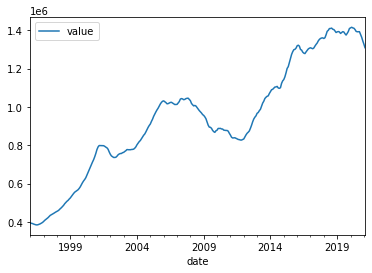

In [9]:
sf_cheese_df_97564.plot() 

In [1]:
sf_cheese_df_97564.diff().plot()

NameError: name 'sf_cheese_df_97564' is not defined

stats = []

for i in range(30):
    
    dftest = adfuller(sf_cheese_df_97564.value.diff(periods = i).dropna())
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                         'p-value', '#Lags Used',
                                         'Number of Observations Used'])
    stats.append(dfoutput[1])

dict(enumerate(stats))

-----------------------------------------------------------

In [12]:
sf_id[1]

97565

sf_cheese_df_97565 = sf_cheese_df[sf_cheese_df.RegionID == sf_id[1]]

sf_cheese_df_97565.drop('RegionID', inplace = True, axis = 1)

sf_cheese_df_97565.variable = pd.to_datetime(sf_cheese_df_97565.variable)

sf_cheese_df_97565.columns = ['date','value']

sf_cheese_df_97565.set_index('date', inplace = True)

stats = []

for i in range(30):
    
    dftest = adfuller(sf_cheese_df_97565.value.diff(periods = i).dropna())
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                         'p-value', '#Lags Used',
                                         'Number of Observations Used'])
    stats.append(dfoutput[1])

dict(enumerate(stats))

<ipython-input-14-0f71746c3f60>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(sf_cheese_df_97564.value, freq=12 )


<Figure size 432x288 with 0 Axes>

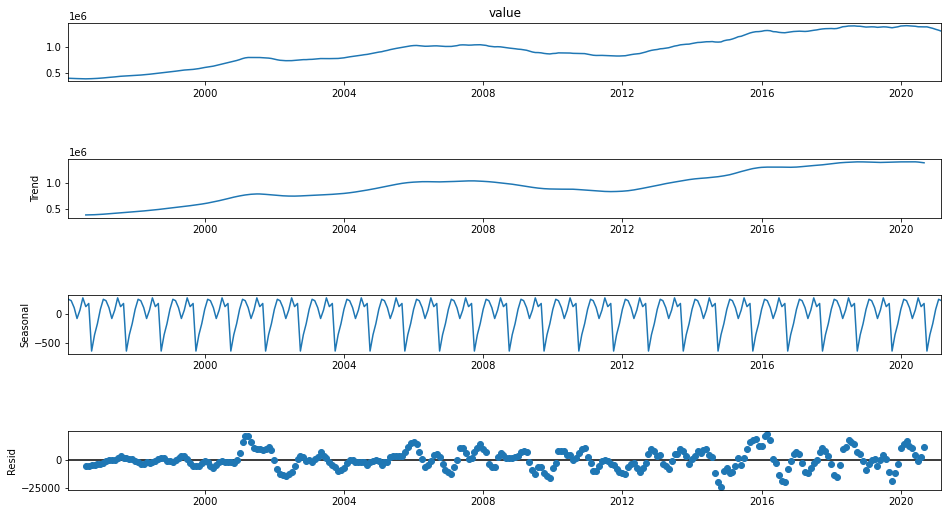

In [14]:

decomposition = seasonal_decompose(sf_cheese_df_97564.value, freq=12 )
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

In [15]:
sf_cheese_df_97564

,value
date,
1996-01-31,395027.0
1996-02-29,392274.0
1996-03-31,391226.0
1996-04-30,388511.0
1996-05-31,386522.0
...,...
2020-10-31,1378099.0
2020-11-30,1363727.0
2020-12-31,1344446.0


In [16]:
#sf_cheese_df_97564MS = sf_cheese_df_97564.shift(-1).resample('M').last()
#sf_cheese_df_97564MS

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


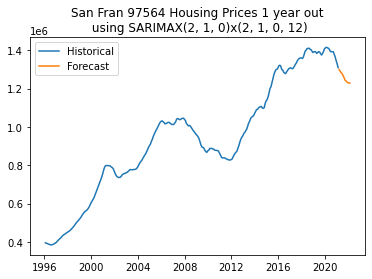

In [17]:
sari_mod =SARIMAX(sf_cheese_df_97564,
                  order=(2, 1, 0),
                  seasonal_order=(2, 1, 0, 12),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()
forecast = sari_mod.forecast(steps=12)
fig, ax = plt.subplots()
ax.plot(sf_cheese_df_97564.index, sf_cheese_df_97564.value, label='Historical')
ax.plot(forecast, label='Forecast')
ax.set_title(f'San Fran 97564 Housing Prices 1 year out\n using SARIMAX(2, 1, 0)x(2, 1, 0, 12)')
plt.legend();

------------------------------------------------------

Making variable names with a for loop

---------------------------------------------------

In [18]:
ids = list(set(sf_cheese_df.RegionID))

keys = ["sf_cheese_df_" + i for i in list(map(str,ids))]

sf_df_list= []

for i in ids:
    
    sf_df_list.append(sf_cheese_df[sf_cheese_df.RegionID == i])
    
    sf_df_list[-1].drop('RegionID', inplace = True, axis = 1)
    
    sf_df_list[-1].columns = ['date', 'value']
    
    sf_df_list[-1].date = pd.to_datetime(sf_df_list[-1].date)
    
    sf_df_list[-1].set_index('date', inplace = True)
    
    sf_df_list[-1].asfreq('MS')
    
    
    
sf_dict = dict(zip(keys,sf_df_list))



ids = list(set(la_cheese_df.RegionID))

keys = ["la_cheese_df_" + i for i in list(map(str,ids))]

la_df_list= []

for i in ids:
    
    la_df_list.append(la_cheese_df[la_cheese_df.RegionID == i])
    
    la_df_list[-1].drop('RegionID', inplace = True, axis = 1)
    
    la_df_list[-1].columns = ['date', 'value']
    
    la_df_list[-1].date = pd.to_datetime(la_df_list[-1].date)
    
    la_df_list[-1].set_index('date', inplace = True)
    
    la_df_list[-1].asfreq('MS')
    
    
    
la_dict = dict(zip(keys,la_df_list))


/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman

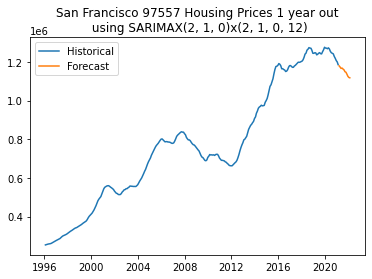

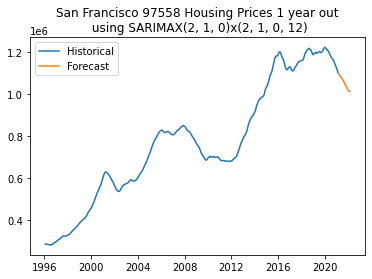

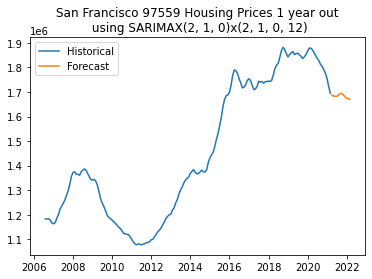

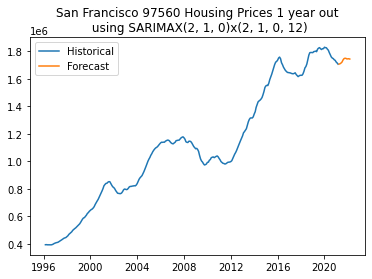

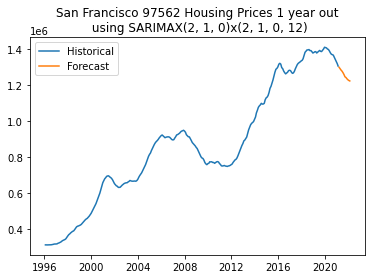

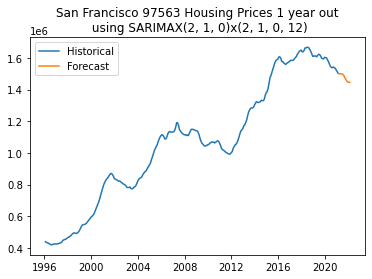

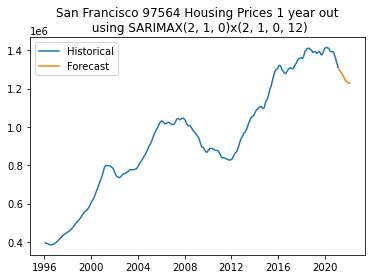

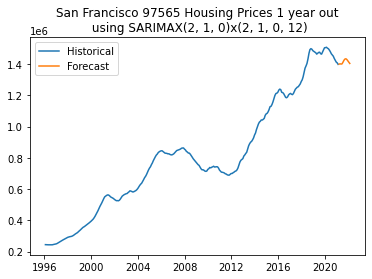

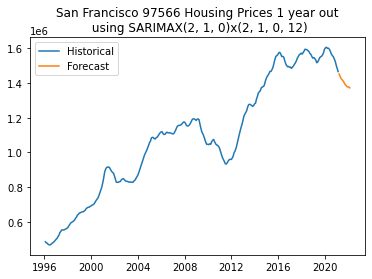

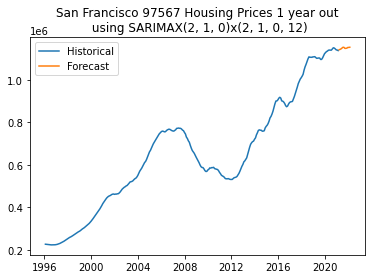

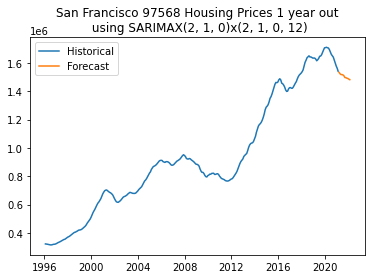

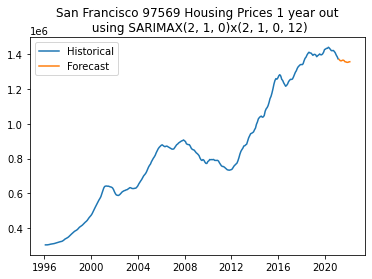

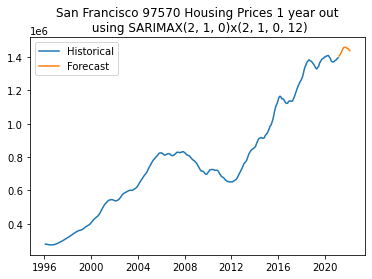

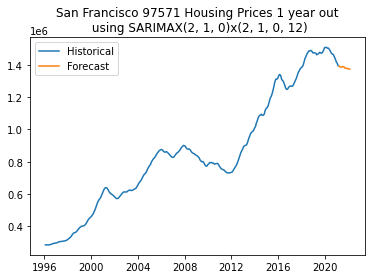

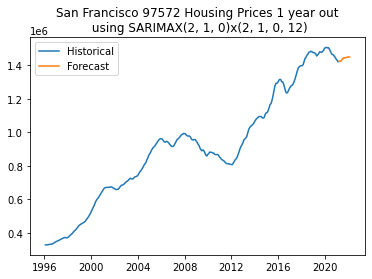

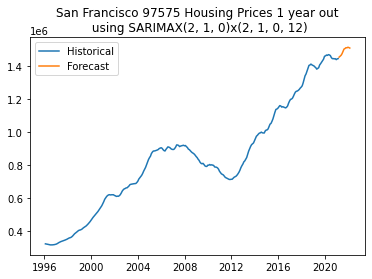

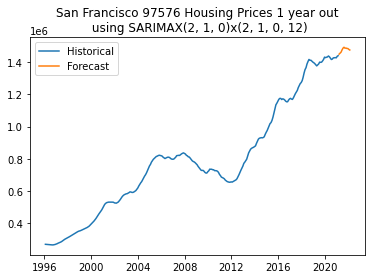

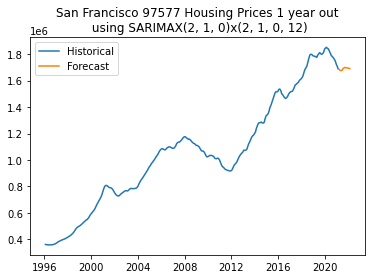

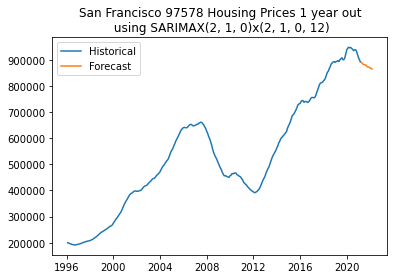

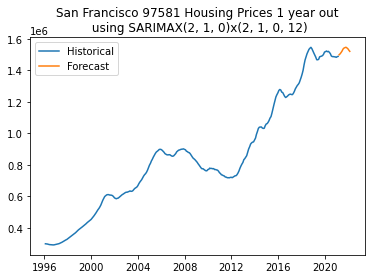

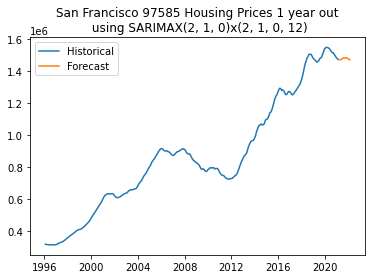

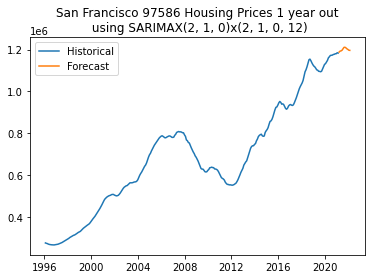

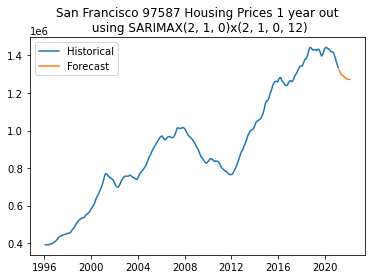

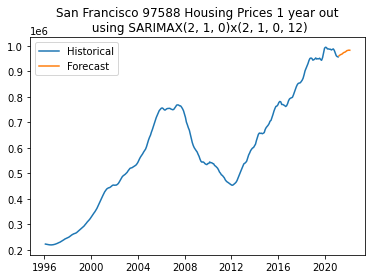

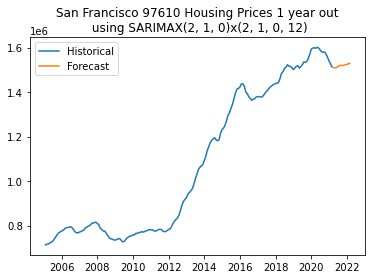

In [19]:
#SF

sf_forecast_dict = {}

for regionid, df  in sf_dict.items():

    sari_mod =SARIMAX(df,
                  order=(2, 1, 0),
                  seasonal_order=(2, 1, 0, 12),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()
    forecast = sari_mod.forecast(steps=12)
    sf_forecast_dict[regionid] = forecast
    fig, ax = plt.subplots()
    ax.plot(df.index, df.value, label='Historical')
    ax.plot(forecast, label='Forecast')
    ax.set_title(f'San Francisco {regionid[-5:]} Housing Prices 1 year out\n using SARIMAX(2, 1, 0)x(2, 1, 0, 12)')
    plt.legend();

In [20]:
sf_forecast_dict

{'sf_cheese_df_97557': 2021-03-31    1.178978e+06
 2021-04-30    1.173008e+06
 2021-05-31    1.165721e+06
 2021-06-30    1.167593e+06
 2021-07-31    1.162613e+06
 2021-08-31    1.158323e+06
 2021-09-30    1.148807e+06
 2021-10-31    1.146076e+06
 2021-11-30    1.136113e+06
 2021-12-31    1.124874e+06
 2022-01-31    1.118999e+06
 2022-02-28    1.117291e+06
 Freq: M, Name: predicted_mean, dtype: float64,
 'sf_cheese_df_97558': 2021-03-31    1.094153e+06
 2021-04-30    1.087257e+06
 2021-05-31    1.079236e+06
 2021-06-30    1.074314e+06
 2021-07-31    1.066560e+06
 2021-08-31    1.058359e+06
 2021-09-30    1.046562e+06
 2021-10-31    1.039767e+06
 2021-11-30    1.029471e+06
 2021-12-31    1.019844e+06
 2022-01-31    1.014639e+06
 2022-02-28    1.012911e+06
 Freq: M, Name: predicted_mean, dtype: float64,
 'sf_cheese_df_97559': 2021-03-31    1.687365e+06
 2021-04-30    1.683002e+06
 2021-05-31    1.683017e+06
 2021-06-30    1.682349e+06
 2021-07-31    1.687833e+06
 2021-08-31    1.693430e+0

In [ ]:
#LA

la_forecast_dict = {}

for regionid, df  in la_dict.items():

    sari_mod =SARIMAX(df,
                  order=(2, 1, 0),
                  seasonal_order=(2, 1, 0, 12),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()
    forecast = sari_mod.forecast(steps=12)
    sf_forecast_dict[regionid] = forecast
    fig, ax = plt.subplots()
    ax.plot(df.index, df.value, label='Historical')
    ax.plot(forecast, label='Forecast')
    ax.set_title(f'Los Angeles {regionid[-5:]} Housing Prices 1 year out\n using SARIMAX(2, 1, 0)x(2, 1, 0, 12)')
    plt.legend();

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilv

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilv

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman

/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/jonathansilverman

----------------------------------------------

Train-test split

-----------------------

In [ ]:
cutoff = round(len(sf_dict[list(sf_dict.keys())[0]])*.8)

sf_train_dict_list = [sf_dict[i][:cutoff] for i in list(sf_dict.keys())]

sf_train_dict = dict(zip(list(sf_dict.keys()), sf_train_dict_list))


la_train_dict_list = [la_dict[i][:cutoff] for i in list(la_dict.keys())]

la_train_dict = dict(zip(list(la_dict.keys()), la_train_dict_list))

--------------

In [2]:
sf_train_dict

NameError: name 'sf_train_dict' is not defined

parameters for sarimax grid search

-----------

In [ ]:
pdq = [(2, 1, 0),(2, 1, 0),(2, 1, 0),(2, 1, 0),(2, 1, 1),(2, 1, 1), (2, 1, 1),(2, 1, 1)]

In [ ]:
seasonal_pdq = [(1, 1, 0, 12),(1, 1, 1, 12),(2, 1, 0, 12),(2, 1, 1, 12),(1, 1, 0, 12),(1, 1, 1, 12),(2, 1, 0, 12),(2, 1, 1, 12)]

In [ ]:

param_list = []
param_seasonal_list = []
aic_list = []


for train in [la_train_dict[i] for i in list(la_dict.keys())]:
    
    for param in pdq:
        
        for param_seasonal in seasonal_pdq:
            
            try:
                mod=SARIMAX(train,
                             order=param,
                             seasonal_order=param_seasonal,
                             enforce_stationarity=False,
                             enforce_invertibility=False)
                param_list.append(param)
                param_seasonal_list.append(param_seasonal)
                aic_list.append(mod.fit().aic)
           
            except: 
                print('Oops!')
                continue

In [ ]:

  
# intialise data of lists.
data = {'param' : param_list,
        'param_seasonal' : param_seasonal_list,
       'aic' : aic_list }
  
# Create DataFrame
sarimax_details_df = pd.DataFrame(data)
  
# Print the output.
sarimax_details_df.shape
